In [1]:
import pandas as pd 
import plotly.express as px 
import seaborn as sns 
import re 

In [2]:
df = pd.read_csv('C:\\Users\\omare\\OneDrive\\Desktop\\New folder\\ds_salaries.csv')
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [3]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [5]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
(df["job_title"].unique())

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

In [7]:
df.drop(['Unnamed: 0' , 'salary' ,'salary_currency'] , axis = 1 , inplace = True)

In [8]:

pattern = r'Machine Learning'

ml_df = df[df['job_title'].str.contains(pattern)]


ml_df


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L
20,2020,MI,FT,Machine Learning Engineer,43331,CN,0,CN,M
29,2020,SE,FT,Machine Learning Manager,117104,CA,50,CA,L
37,2020,EN,FT,Machine Learning Engineer,250000,US,50,US,L
...,...,...,...,...,...,...,...,...,...
503,2022,MI,FT,Machine Learning Engineer,87425,AU,100,AU,L
506,2022,MI,FT,Applied Machine Learning Scientist,75000,BO,100,US,L
513,2022,SE,FT,Machine Learning Engineer,71444,IE,100,IE,S
532,2022,SE,FT,Machine Learning Engineer,214000,US,100,US,M


In [19]:
px.bar(ml_df.groupby('work_year').get_group(2022) , x = 'job_title' , y = 'salary_in_usd' , color = 'experience_level' ,title ='machine learning salary in 2022' ,hover_data =[ 'employment_type' , 'company_location' , 'remote_ratio'])

In [10]:
px.scatter(ml_df.groupby('work_year').get_group(2021) , x = 'job_title' ,
            y ='salary_in_usd' ,
            color = 'experience_level' ,title ='machine learning salary in 2021' , hover_data =[ 'employment_type' , 'company_location' , 'remote_ratio'])

In [11]:
pattern = r'Analytics|Analyst'

analyst_df = df[df['job_title'].str.contains(pattern)]


analyst_df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
5,2020,EN,FT,Data Analyst,72000,US,100,US,L
8,2020,MI,FT,Business Data Analyst,135000,US,100,US,L
13,2020,MI,FT,Lead Data Analyst,87000,US,100,US,L
14,2020,MI,FT,Data Analyst,85000,US,100,US,L
...,...,...,...,...,...,...,...,...,...
597,2022,SE,FT,Data Analyst,170000,US,100,US,M
600,2022,EN,FT,Data Analyst,67000,CA,0,CA,M
601,2022,EN,FT,Data Analyst,52000,CA,0,CA,M
604,2022,SE,FT,Data Analyst,129000,US,0,US,M


In [12]:
px.scatter(analyst_df.groupby('work_year').get_group(2021)
           , x = 'job_title' 
           , y ='salary_in_usd' ,
           color = 'experience_level' ,
           title ='analyst salary in 2021' , 
           hover_data =[ 'employment_type' , 'company_location' , 'remote_ratio']
          )

In [13]:
px.scatter(analyst_df.groupby('work_year').get_group(2022) ,
           x = 'job_title' , 
           y = 'salary_in_usd' , 
           color = 'experience_level' ,
           title ='analyst  salary in 2022' ,
           hover_data =[ 'employment_type' , 'company_location' , 'remote_ratio']
          )

In [14]:
df 

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,US,100,US,M


In [15]:

highest_2022 = df[df['work_year']==2022].sort_values('salary_in_usd').tail(10) 
px.scatter( highest_2022 , 
           x = 'job_title' , 
           y = 'salary_in_usd' ,
           color = 'experience_level',
           title = 'highsest salaries in 2022')

In [16]:
highest_2021 = df[df['work_year']==2021].sort_values('salary_in_usd').tail(10)
px.scatter(highest_2021, 
           x = 'job_title' , 
           y = 'salary_in_usd' ,
           color = 'experience_level',
           title = 'highsest salaries in 2021',
           hover_data =[ 'employment_type' , 'company_location' , 'remote_ratio']
)
 

In [17]:
entery_2021 =df[(df['work_year']==2022) & (df['experience_level'] == 'EN')].sort_values('salary_in_usd').tail(10)

px.scatter(entery_2021, 
           x = 'job_title' , 
           y = 'salary_in_usd' ,
           color = 'company_location',
           title = 'highsest entery salary in 2022',
           hover_data =[ 'employment_type' , 'company_location' , 'remote_ratio']
)

<Axes: xlabel='employee_residence', ylabel='count'>

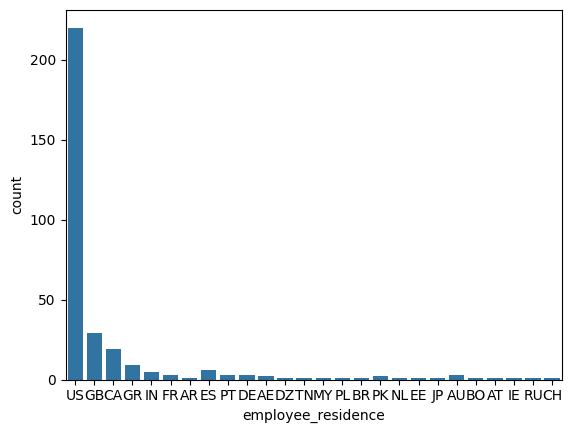

In [18]:
sns.countplot(x = 'employee_residence' , data = df[(df['work_year']==2022)] )